# Analysis of Chess Grandmaster Zhigalko Sergei's lichess games

In [5]:
import pandas as pd
import numpy as np
import lichess.api
import lichess.pgn
import chess.pgn
from api_key import auth
from lichess.format import PGN, SINGLE_PGN, PYCHESS
import matplotlib.pyplot as plt
import tqdm

### Api call to retreive 1000 games

In [6]:
# games = lichess.api.user_games('Zhigalko_Sergei', max=1000, auth=auth, format=PYCHESS)


In [7]:
# some text splitting to use pychess's game output as a 2D numpy array
def end_game_heatmap(board, piece):
    tally = np.zeros((8, 8))
    rows = board.split("\n")
    for i in range(len(rows)):
        spaces = rows[i].split(' ')
        for j in range(len(spaces)):
            if spaces[j] == piece:
                tally[i, j] += 1.

    return tally

In [25]:
def plot_heatmap(count, heatmap):
    print(f"There were {int(count)} games considered ")
    plt.rcParams["figure.figsize"] = (8,8)
    Z1 = np.add.outer(np.arange(8), np.arange(8)) % 2  # chessboard
    extent = -.5, 7.5, -.5, 7.5
    im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', extent=extent)
    #data = plt.imshow(heatmap/np.linalg.norm(heatmap), interpolation='lanczos', alpha=.96,cmap="cool")
    data = plt.imshow(heatmap/count, interpolation='lanczos', alpha=.96,cmap="cool")
    plt.xticks(np.arange(8), labels = ["a","b","c","d","e","f","g","h"])
    plt.yticks(np.arange(8), labels = np.flip(np.arange(8) + 1))
    plt.xlabel("file")
    plt.ylabel("rank")
    plt.colorbar(data)

In [9]:
pgn = open("Zhigalko_Sergei.pgn")
count = 0
imageK = np.zeros((8,8))
imageQ = np.zeros((8,8))
imageN = np.zeros((8,8))
imageP = np.zeros((8,8))
for _ in tqdm.tqdm(pgn):
    game = chess.pgn.read_game(pgn)
    try:
        if (game.headers["White"] == "Zhigalko_Sergei") and (game.headers["Result"] == "1-0"):
            board = str(game.end().board())
            imageK += end_game_heatmap(board, "K")
            imageQ += end_game_heatmap(board, "Q")
            imageN += end_game_heatmap(board, "N")
            imageP += end_game_heatmap(board, "P")
            count += 1
    except:
        continue
        
pgn.close()

20887it [01:44, 199.39it/s]


There were 7978 games considered 


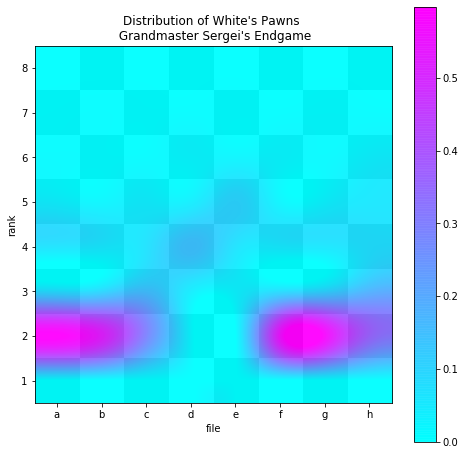

There were 7978 games considered 


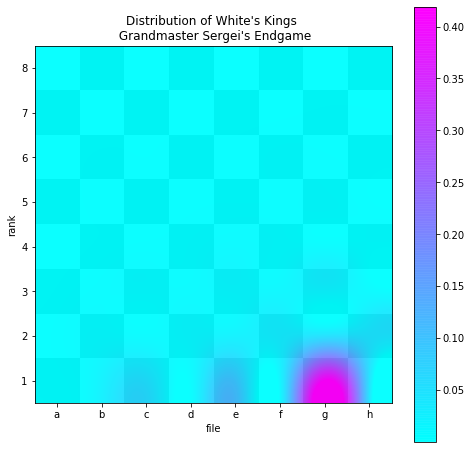

There were 7978 games considered 


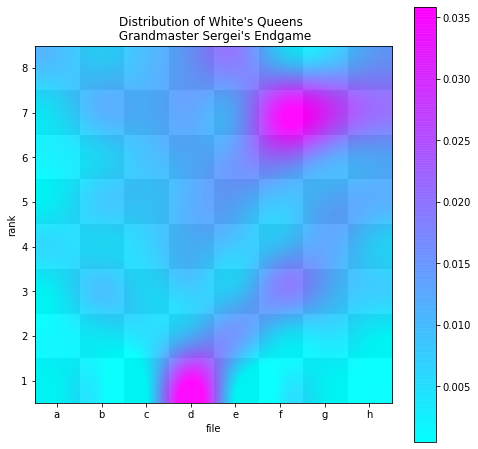

There were 7978 games considered 


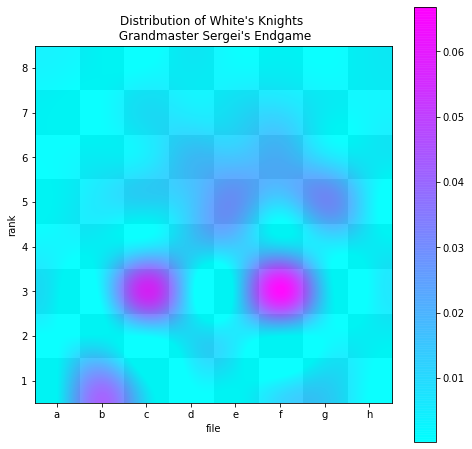

In [30]:
plot_heatmap(count, imageP)
plt.title("Distribution of White's Pawns \n Grandmaster Sergei's Endgame")
plt.savefig("pawn_heatmap.png")
plt.show()



plot_heatmap(count, imageK)
plt.title("Distribution of White's Kings \n Grandmaster Sergei's Endgame")
plt.savefig("king_heatmap.png")
plt.show()


plot_heatmap(count, imageQ)
plt.title("Distribution of White's Queens \n Grandmaster Sergei's Endgame")
plt.savefig("queen_heatmap.png")
plt.show()



plot_heatmap(count, imageN)
plt.title("Distribution of White's Knights \n Grandmaster Sergei's Endgame")
plt.savefig("knight_heatmap.png")
plt.show()

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [  40.,   58.,   40.,   59.,   47.,   47.,   73.,   57.],
       [  85.,   63.,   75.,  162.,  174.,  169.,   98.,  255.],
       [ 269.,  165.,  305.,  308.,  805.,  164.,  240.,  440.],
       [ 515.,  446.,  551., 1154.,  532.,  420.,  455.,  604.],
       [ 610.,  726., 1184.,  329.,  243.,  616.,  827., 1436.],
       [4766., 4181., 2303.,  137.,   62., 4463., 4578., 2863.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]])